In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
np.random.seed(0)

In [51]:
data_dir = os.path.join(os.getcwd(), 'data')
nodes_path = os.path.join(data_dir, 'nodes.csv')
nodes = pd.read_csv(nodes_path)
print(nodes)
N = len(nodes)
print(N)

   node_id area       lat       lon  exists comment
0        0   A2  5.488135  7.151894   False     NaN
1        1   A2  8.579456  8.472517   False     NaN
2        2   A1  6.458941  4.375872    True  Acivte
3        3   A1  0.567130  2.726563   False     NaN
4        4   A2  7.917250  5.288949    True  Acivte
5        5   A2  3.927848  8.360788    True  Acivte
6        6   A1  0.871293  0.202184   False     NaN
7        7   A1  9.571552  1.403508    True  Acivte
8        8   A2  9.786183  7.991586   False     NaN
9        9   A2  5.204775  6.788795   False     NaN
10


In [52]:
eucledian_distance = lambda x1, y1, x2, y2: np.sqrt((x1-x2)**2 + (y1-y2)**2)

In [53]:
distance_matrix = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        distance_matrix[i][j] = eucledian_distance(nodes.loc[i, "lat"], nodes.loc[i, "lon"], nodes.loc[j, "lat"], nodes.loc[j, "lon"])

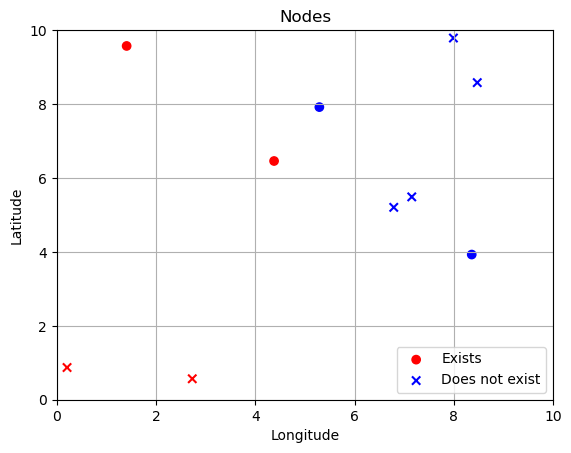

In [54]:
plt.figure()
area_to_color = {"A1": "red", "A2": "blue"}
colormap = np.array([area_to_color[area] for area in nodes["area"]])
plt.scatter(nodes[nodes["exists"]]["lon"], nodes[nodes["exists"]]["lat"], c=colormap[nodes["exists"]], marker="o", label="Exists")
plt.scatter(nodes[~nodes["exists"]]["lon"], nodes[~nodes["exists"]]["lat"], c=colormap[~nodes["exists"]], marker='x', label="Does not exist")
plt.title("Nodes")
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()
plt.legend()
plt.show()

In [55]:
generators = pd.read_csv(os.path.join(data_dir, 'generators.csv'))

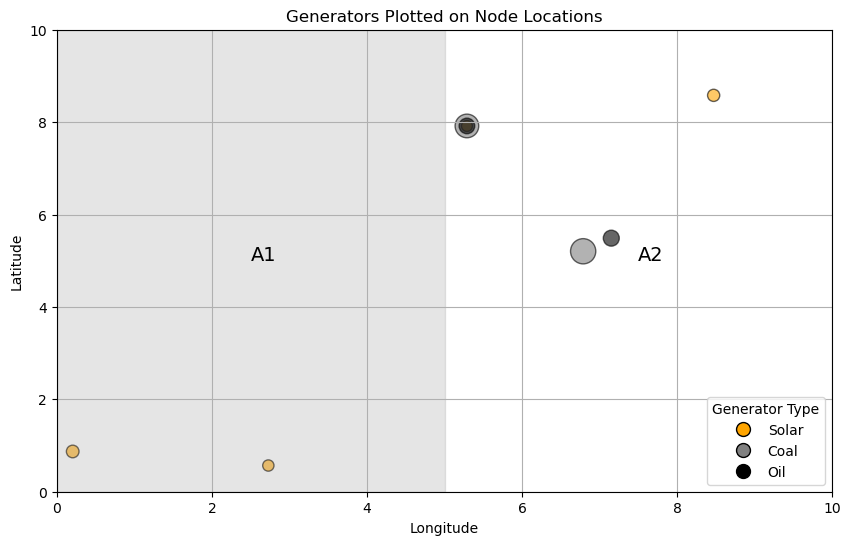

In [56]:
gen_with_location = pd.merge(generators, nodes, left_on="node_id", right_on="node_id")
import matplotlib.pyplot as plt

# Define a color map for generator types
color_map = {
    'solar': 'orange',
    'coal': 'gray',
    'oil': 'black'
}

# Map the color based on the generator type
gen_with_location['color'] = gen_with_location['type'].map(color_map)

# Plot
plt.figure(figsize=(10, 6))

# Scatter plot with different colors for each generator type
for gen_type, color in color_map.items():
    subset = gen_with_location[gen_with_location['type'] == gen_type]
    plt.scatter(subset['lon'], subset['lat'], 
                s=subset['pmax'],  # Circle size based on pmax
                color=color, label=gen_type.capitalize(), alpha=0.6, edgecolor="black")

plt.axvspan(xmin=0, xmax=5, color='gray', alpha=0.2)
plt.text(2.5, 5, 'A1', fontsize=14, color='black')  # A1 label (left side)
plt.text(7.5, 5, 'A2', fontsize=14, color='black')    # A2 label (right side)

# Labels, title, and grid
plt.title("Generators Plotted on Node Locations")
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)

# Create custom legend with same-sized circles
handles = [
    plt.Line2D([0], [0], marker='o', color='w', label='Solar', markersize=10, markerfacecolor='orange', markeredgecolor='black'),
    plt.Line2D([0], [0], marker='o', color='w', label='Coal', markersize=10, markerfacecolor='gray', markeredgecolor='black'),
    plt.Line2D([0], [0], marker='o', color='w', label='Oil', markersize=10, markerfacecolor='black', markeredgecolor='black')
]

plt.legend(title="Generator Type", handles=handles)



# Display the plot
plt.show()


In [57]:
nodes = pd.read_csv(os.path.join(data_dir, 'nodes.csv'))
generators = pd.read_csv(os.path.join(data_dir, 'generators.csv'))
branches = pd.read_csv(os.path.join(data_dir, 'branches.csv'))
hourly_demand = pd.read_csv(os.path.join(data_dir, 'hourly_demand.csv'))

In [58]:
generators

,generator_id,desc,type,pmax,pmin,MC,CO2,node_id
0,0,Solar in A2,solar,76.868661,0.000000,8.793078,0.000000,1
1,1,Oil in A2,oil,126.455561,50.582224,73.227011,0.736845,4
2,2,Oil in A1,oil,132.414101,52.965640,54.490246,0.666696,0
3,3,Coal in A2,coal,289.989998,86.996999,32.261269,1.160939,4
4,4,Coal in A2,coal,330.628007,99.188402,23.418192,0.943261,9
5,5,Solar in A2,solar,66.252361,0.000000,5.192127,0.000000,3
6,6,Solar in A1,solar,82.639516,0.000000,8.175294,0.000000,6
7,7,Solar in A1,solar,62.664580,0.000000,7.331554,0.000000,4


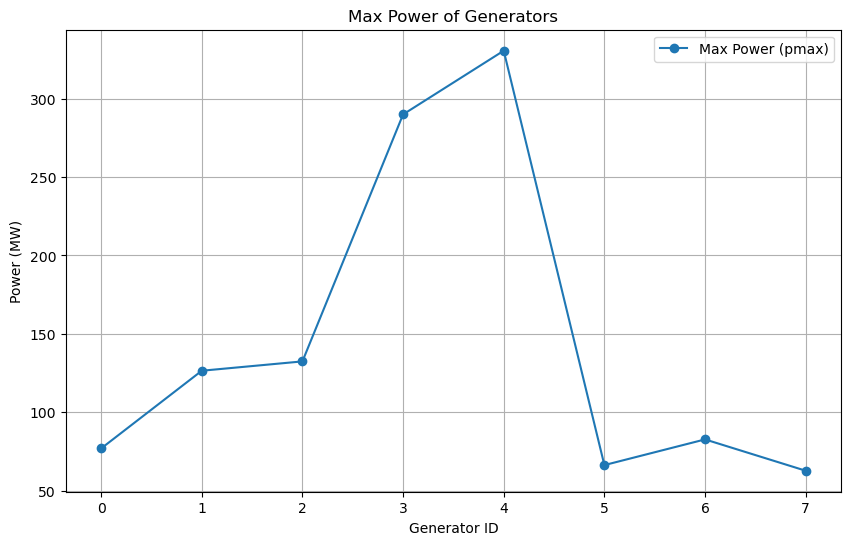

In [59]:
# Plotting the min and max values
plt.figure(figsize=(10, 6))
plt.plot(generators['generator_id'], generators['pmax'], marker='o', label='Max Power (pmax)')

# Adding labels and title
plt.xlabel('Generator ID')
plt.ylabel('Power (MW)')
plt.title('Max Power of Generators')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

In [60]:
# Plot the capacity of the branches on a 2d plot where the capacity of each branch is represented by the thickness of the line and with text label

# Plot


In [61]:
branches

,branch_id,node_from,node_to,capacity,distance,loss_factor
0,0,0,9,138.247953,0.460579,0.004606
1,1,0,5,448.441013,1.973809,0.019738
2,2,0,7,367.037322,7.051116,0.070511
3,3,1,8,177.087191,1.299033,0.012990
4,4,1,4,467.236780,3.251711,0.032517
5,5,1,3,331.872357,9.859684,0.098597
6,6,2,4,282.359375,1.720574,0.017206
7,7,2,9,356.940700,2.719399,0.027194
8,8,2,3,201.610092,6.118305,0.061183
9,9,3,6,320.431659,2.542637,0.025426


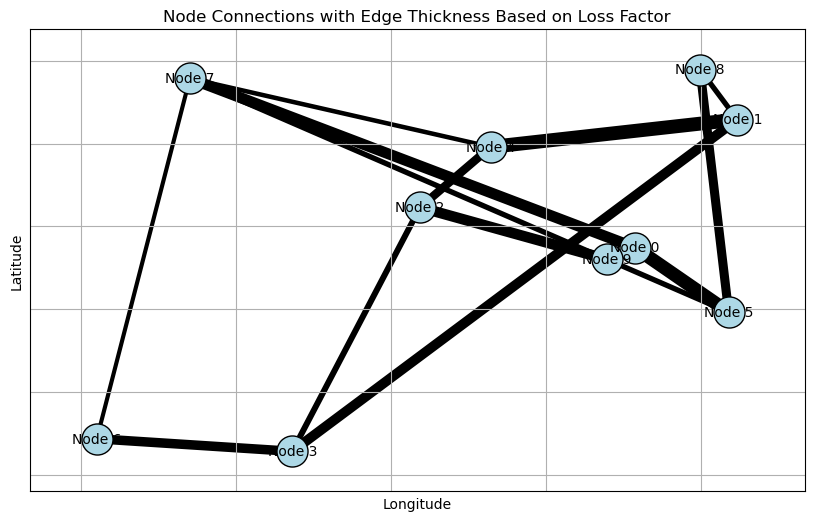

In [62]:
import matplotlib.pyplot as plt
import networkx as nx


# Create a new graph for plotting
G_plot = nx.Graph()

branches["normalized_capacity"] = branches["capacity"] / branches["capacity"].max()

# Add nodes to the graph
for idx, row in nodes.iterrows():
    G_plot.add_node(row['node_id'], pos=(row['lon'], row['lat']))

# Add edges to the graph with normalized loss factor for thickness
for _, row in branches.iterrows():
    G_plot.add_edge(row['node_from'], row['node_to'], weight=row['normalized_capacity'])

# Get positions of nodes (for plotting)
pos = {node_id: (data['pos'][0], data['pos'][1]) for node_id, data in G_plot.nodes(data=True)}

# Plot the nodes
plt.figure(figsize=(10, 6))
nx.draw_networkx_nodes(G_plot, pos, node_size=500, node_color='lightblue', edgecolors='black')

# Plot the edges with varying thickness based on the normalized loss factor
edges = G_plot.edges(data=True)
nx.draw_networkx_edges(G_plot, pos, edgelist=edges, width=[row['weight'] * 10 for u, v, row in edges])

# Add labels to the nodes
nx.draw_networkx_labels(G_plot, pos, labels={node_id: f'Node {node_id}' for node_id in G_plot.nodes()}, font_size=10)

# Title and display the plot
plt.title("Node Connections with Edge Thickness Based on Loss Factor")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


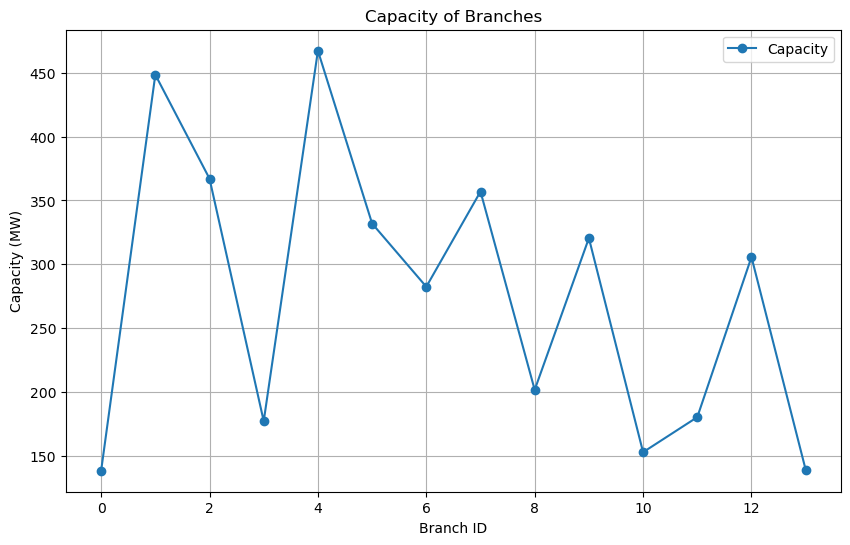

In [63]:
plt.figure(figsize=(10, 6))
plt.plot(branches["branch_id"], branches["capacity"], marker='o', label='Capacity')
plt.xlabel('Branch ID')
plt.ylabel('Capacity (MW)')
plt.title('Capacity of Branches')
plt.legend()
plt.grid(True)
plt.show()


In [64]:
total_pmax = generators['pmax'].sum()
print(f"Total pmax: {total_pmax} MW")
# print(f"Total demand: {total_demand} MW")


Total pmax: 1167.912786031749 MW


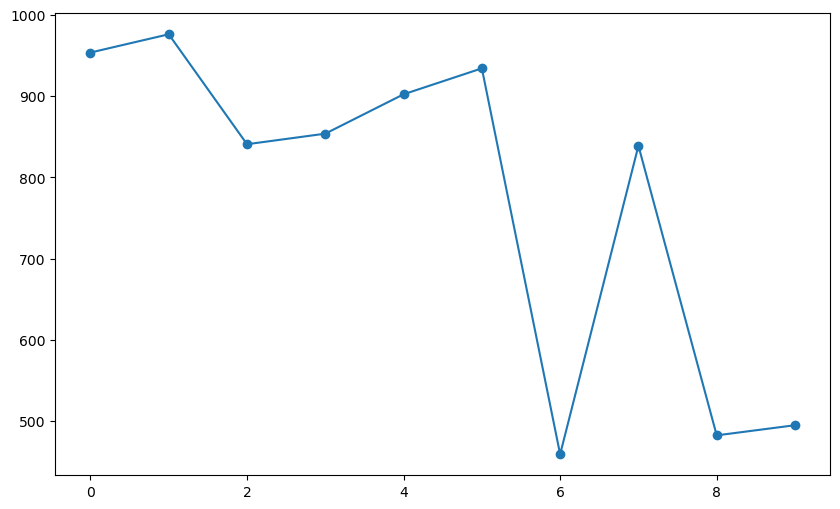

In [65]:
# Corrected code to sum capacities for branches going out or in from each node
total_capacity_per_node = [
    branches[(branches["node_from"] == i) | (branches["node_to"] == i)]["capacity"].sum() 
    for i in range(0, 10)
]


plt.figure(figsize=(10, 6))
plt.plot(range(len(total_capacity_per_node)), total_capacity_per_node, marker='o', label='Capacity')


<Axes: xlabel='hour'>

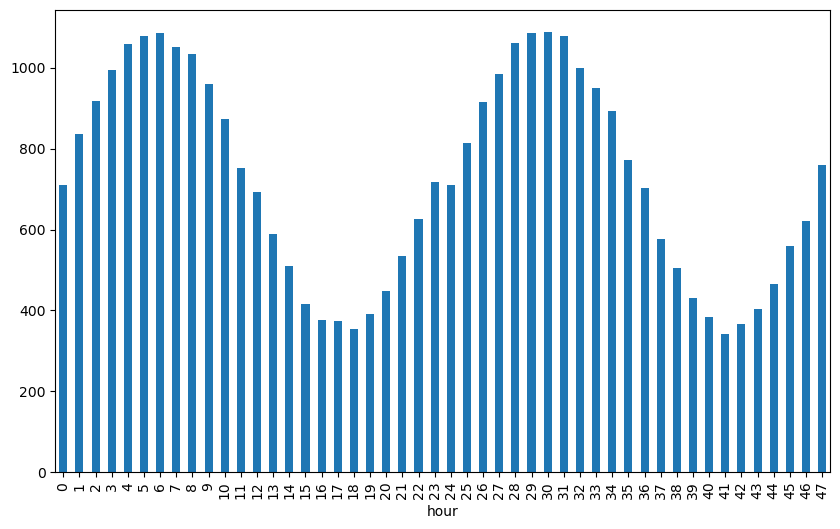

In [66]:
hourly_demand.groupby('hour')['demand'].sum().plot(kind='bar', figsize=(10, 6))

In [67]:
hourly_demand

,node_id,hour,demand
0,0,0,55.076715
1,0,1,69.522305
2,0,2,72.471685
3,0,3,75.413006
4,0,4,85.851715
...,...,...,...
475,9,43,26.592568
476,9,44,36.385658
477,9,45,37.409592
478,9,46,40.949734


In [68]:
generators = pd.read_csv(os.path.join(data_dir, 'generators.csv'))
generators


,generator_id,desc,type,pmax,pmin,MC,CO2,node_id
0,0,Solar in A2,solar,76.868661,0.000000,8.793078,0.000000,1
1,1,Oil in A2,oil,126.455561,50.582224,73.227011,0.736845,4
2,2,Oil in A1,oil,132.414101,52.965640,54.490246,0.666696,0
3,3,Coal in A2,coal,289.989998,86.996999,32.261269,1.160939,4
4,4,Coal in A2,coal,330.628007,99.188402,23.418192,0.943261,9
5,5,Solar in A2,solar,66.252361,0.000000,5.192127,0.000000,3
6,6,Solar in A1,solar,82.639516,0.000000,8.175294,0.000000,6
7,7,Solar in A1,solar,62.664580,0.000000,7.331554,0.000000,4
